# Explore here

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score

from imblearn.over_sampling import SMOTE
# usa pip install imbalanced-learn si no carga este


url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"

In [46]:
df = pd.read_csv(url, sep = ";")

In [47]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
print("Dimensiones:", df.shape)

Dimensiones: (1599, 12)


In [50]:
print(df["quality"].value_counts().sort_index())

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


In [51]:
df['label'] = df['quality'].apply(lambda q: 0 if q <= 4 else (1 if q <= 6 else 2))

print("\nDistribución de etiquetas (label):")
print(df['label'].value_counts().sort_index())


Distribución de etiquetas (label):
label
0      63
1    1319
2     217
Name: count, dtype: int64


In [52]:
X = df.drop(columns=['label', 'quality'])
y = df['label']

In [53]:
# Seleccionamos solo los valores de quality que nos interesan
ejemplos = df[df['quality'].isin([3,4,5,6,7,8])]

# Tomamos 5 filas aleatorias de cada calidad
ejemplos = ejemplos.groupby('quality').apply(lambda x: x.sample(5, random_state=42))

# Limpiamos el índice para que se vea ordenado
ejemplos = ejemplos.reset_index(drop=True)

# Opcional: seleccionamos solo algunas columnas importantes para ver mejor
columnas_interes = ['quality', 'alcohol', 'pH', 'residual sugar', 'volatile acidity', 'sulphates']
print(ejemplos[columnas_interes])


    quality  alcohol    pH  residual sugar  volatile acidity  sulphates
0         3     10.2  3.40             5.7             0.875       0.52
1         3      8.4  3.16             2.1             0.610       0.63
2         3     10.9  3.50             2.1             1.580       0.40
3         3      9.0  3.25             2.2             0.580       0.57
4         3      9.7  3.31             2.1             0.980       0.55
5         4     11.3  3.43             3.4             0.935       0.64
6         4     12.0  3.28             6.3             0.400       0.56
7         4     10.0  3.59             2.1             0.785       0.61
8         4     10.4  3.31             2.0             0.635       0.57
9         4     11.1  3.41             3.9             0.680       0.52
10        5     10.5  3.32             2.2             0.470       0.63
11        5      9.4  3.24             2.3             0.885       0.53
12        5     10.7  3.45             3.0             0.775    

/tmp/ipykernel_729/1691117254.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ejemplos = ejemplos.groupby('quality').apply(lambda x: x.sample(5, random_state=42))


Para saber que vinos son buenos y cuales son malos vemos los ejemplos de cada vino en qualiti (aqui hay 5 ejemplos) por lo que podemos ver los 3 son los peores por sus componentes quimicos y los 8 los mejores:

Quality 3 (peores):
Alcohol bajo, acidez volátil alta y pocos sulfatos → sabor débil y avinagrado.

Quality 4:
Algo más de alcohol y menor acidez volátil que los 3 → ligeramente mejor sabor.

Quality 5:
Alcohol medio, acidez controlada y sulfatos suficientes → vinos equilibrados de calidad media.

Quality 6:
Alcohol más alto, residual sugar bajo y acidez moderada → vinos secos, equilibrados y agradables.

Quality 7:
Alcohol alto, acidez baja y sulfatos buenos → sabores finos y más cuerpo, claramente buenos.

Quality 8 (mejores):
Alcohol alto, acidez muy baja y sulfatos altos → vinos con gran sabor, estabilidad y complejidad.

In [54]:
smote = SMOTE( random_state= 42)

X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print("Distribución final en entrenamiento:", y_train.value_counts())
print("Distribución final en test:", y_test.value_counts())
print(f"\nTamaños: X_train={X_train.shape}, X_test={X_test.shape}")

Distribución final en entrenamiento: label
2    1081
0    1054
1    1030
Name: count, dtype: int64
Distribución final en test: label
1    289
0    265
2    238
Name: count, dtype: int64

Tamaños: X_train=(3165, 11), X_test=(792, 11)


In [55]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [56]:
X_train_res, y_train_res = smote.fit_resample(X_train_s, y_train)

print("\nDistribución antes de SMOTE:", np.bincount(y_train))
print("Distribución después de SMOTE:", np.bincount(y_train_res))


Distribución antes de SMOTE: [1054 1030 1081]
Distribución después de SMOTE: [1081 1081 1081]


In [57]:
k_inicial = 5
knn = KNeighborsClassifier(n_neighbors=k_inicial)
knn.fit(X_train_res, y_train_res)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [58]:
y_pred = knn.predict(X_test_s)

acc = accuracy_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, digits=4)

In [59]:
print(f"\nK={k_inicial} → Accuracy: {acc:.4f}, Balanced Accuracy: {balanced_acc:.4f}")
print("\nMatriz de confusión:")
print(cm)
print("\nClassification Report:")
print(report)


K=5 → Accuracy: 0.8611, Balanced Accuracy: 0.8718

Matriz de confusión:
[[264   1   0]
 [ 47 185  57]
 [  0   5 233]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8489    0.9962    0.9167       265
           1     0.9686    0.6401    0.7708       289
           2     0.8034    0.9790    0.8826       238

    accuracy                         0.8611       792
   macro avg     0.8736    0.8718    0.8567       792
weighted avg     0.8789    0.8611    0.8532       792



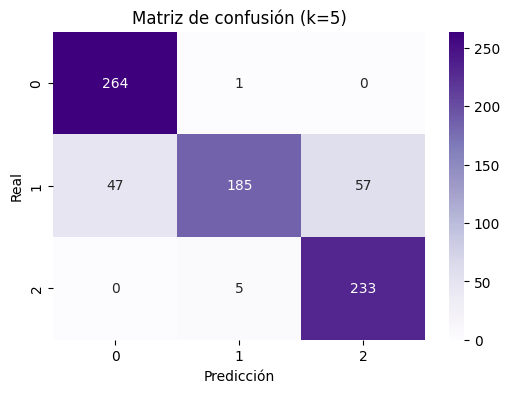

In [60]:
# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de confusión (k={k_inicial})")
plt.show()

In [61]:
#probar k de 1-20
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_res, y_train_res)
    y_pred_k = knn_k.predict(X_test_s)
    accuracies.append(accuracy_score(y_test, y_pred_k))

results = pd.DataFrame({
    'k': k_values,
    'accuracy': accuracies
})

display(results)


,k,accuracy
0,1,0.917929
1,2,0.888889
2,3,0.882576
3,4,0.869949
4,5,0.861111
5,6,0.848485
6,7,0.848485
7,8,0.847222
8,9,0.844697
9,10,0.830808


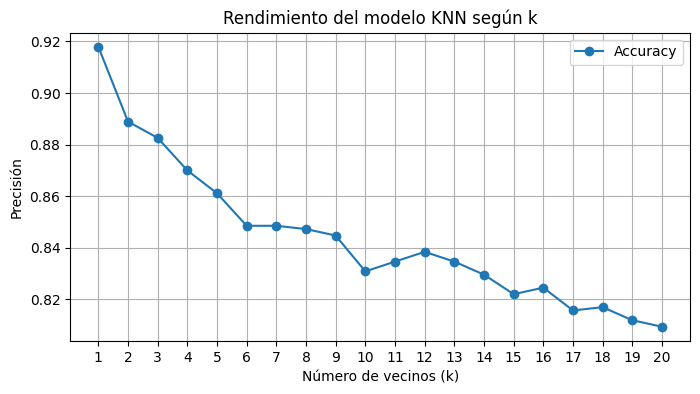

In [62]:
# Gráfico accuracy vs k
plt.figure(figsize=(8,4))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.xticks(k_values)
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.title("Rendimiento del modelo KNN según k")
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# Entrenar modelo final con mejor k
knn_best = KNeighborsClassifier(n_neighbors= best_k)
knn_best.fit(X_train_res, y_train_res)
y_pred_best = knn_best.predict(X_test_s)

print("\n--- Evaluación final ---")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best, digits=4))




--- Evaluación final ---
Accuracy: 0.9179292929292929
Classification Report:
              precision    recall  f1-score   support

           0     0.9132    0.9925    0.9512       265
           1     0.9828    0.7889    0.8752       289
           2     0.8676    0.9916    0.9255       238

    accuracy                         0.9179       792
   macro avg     0.9212    0.9243    0.9173       792
weighted avg     0.9249    0.9179    0.9157       792



In [64]:
best_acc_k = results.loc[results['accuracy'].idxmax(), 'k']
best_acc = results.loc[results['accuracy'].idxmax(), 'accuracy']

print(f"La mejor k según Accuracy es {best_acc_k} con un valor de {best_acc:.4f}")

La mejor k según Accuracy es 1 con un valor de 0.9179


In [65]:
# Función de predicción
label_map = {0: "Baja calidad ", 1: "Calidad media ", 2: "Alta calidad "}

def predict_wine_quality(features, model=knn_best, scaler_obj=scaler):
    """
    features: lista con los 11 valores en el mismo orden que el dataset:
    fixed acidity, volatile acidity, citric acid, residual sugar, chlorides,
    free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol
    """
    arr = np.array(features).reshape(1, -1)
    arr_s = scaler_obj.transform(arr)
    pred = model.predict(arr_s)[0]
    return f"Predicción: {label_map[pred]} (clase {pred})"

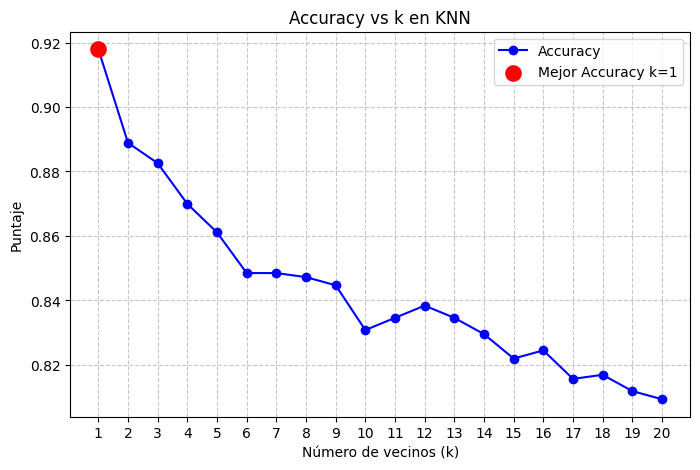

In [67]:
# Mejor k según accuracy
best_acc_k = results.loc[results['accuracy'].idxmax(), 'k']
best_acc_val = results.loc[results['accuracy'].idxmax(), 'accuracy']

plt.figure(figsize=(8,5))

# Curva de Accuracy
plt.plot(results['k'], results['accuracy'], marker='o', label='Accuracy', color='blue')

# Marcar punto máximo
plt.scatter(best_acc_k, best_acc_val, color='red', s=120, zorder=5, label=f'Mejor Accuracy k={best_acc_k}')

plt.title("Accuracy vs k en KNN")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Puntaje")
plt.xticks(results['k'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


# Métricas de Evaluación de Clasificación

Cuando entrenamos un modelo de clasificación, necesitamos medir qué tan bien está funcionando.

## 1. Accuracy (Exactitud)
La **accuracy** mide el porcentaje de predicciones correctas del modelo sobre el total de predicciones.

- Ejemplo simple:  
  Si tu modelo hace 100 predicciones y 90 son correctas, la accuracy es 90%.

- Limitación:  
  La accuracy puede ser engañosa si las clases están desbalanceadas.  
  Por ejemplo, si el 95% de los datos pertenecen a una clase, un modelo que siempre predice esa clase tendrá **alta accuracy**, pero no realmente predice bien las clases minoritarias.

---

**Resumen:**

| Accuracy            | % de predicciones correctas     | Cuando las clases están balanceadas          |
